### Performance 

In [4]:
#!pip install customhys==1.1.6;
!pip install optproblems

In [8]:
from cProfile import label

from customhys import benchmark_func as bf
from customhys import metaheuristic as mh


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

import numpy as np
import pandas as pd

In [9]:
functions =bf.__all__
functions   

['Ackley1',
 'Ackley4',
 'Alpine1',
 'Alpine2',
 'Bohachevsky',
 'Brent',
 'Brown',
 'CarromTable',
 'ChungReynolds',
 'Cigar',
 'CosineMixture',
 'CrossInTray',
 'CrossLegTable',
 'CrownedCross',
 'Csendes',
 'Deb1',
 'Deb2',
 'DeflectedCorrugatedSpring',
 'DixonPrice',
 'DropWave',
 'EggHolder',
 'Ellipsoid',
 'ExpandedDecreasingMinima',
 'ExpandedEqualMinima',
 'ExpandedFiveUnevenPeakTrap',
 'ExpandedTwoPeakTrap',
 'ExpandedUnevenMinima',
 'Exponential',
 'F2',
 'Giunta',
 'Griewank',
 'HappyCat',
 'HyperEllipsoid',
 'InvertedCosineWave',
 'JennrichSampson',
 'KTablet',
 'Katsuura',
 'Levy',
 'LunacekN01',
 'LunacekN02',
 'Michalewicz',
 'Mishra1',
 'Mishra2',
 'Mishra7',
 'Mishra11',
 'ModifiedVincent',
 'NeedleEye',
 'Pathological',
 'Periodic',
 'Perm01',
 'Perm02',
 'Pinter',
 'PowellSum',
 'Price01',
 'Qing',
 'Quartic',
 'Quintic',
 'Rana',
 'Rastrigin',
 'Ridge',
 'Rosenbrock',
 'RotatedHyperEllipsoid',
 'Salomon',
 'Sargan',
 'SchafferN1',
 'SchafferN2',
 'SchafferN3',
 'Sch

In [ ]:
# Name: SwarmMetaheuristic
# Code:
from pathlib import Path
import benchmark_func as bf
import metaheuristic as mh

fun = bf.Rastrigin(2)   
prob = fun.get_formatted_problem()

heur = [
    (
        'swarm_dynamic',
        {
            'factor': 0.7,
            'self_conf': 2.54,
            'swarm_conf': 2.56,
            'version': 'inertial',
            'distribution': 'levy'
        },
        'probabilistic'
    )
]

met = mh.Metaheuristic(prob, heur, num_iterations=5000, num_agents=100)
met.verbose = True
met.run()

print('x_best = {}, f_best = {}'.format(*met.get_solution()))



Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='levy') with probabilistic
--------------------------------------------------
1
pop. radius: 1.455838037981038
x_best = [0.11190886 0.14873227], f_best = 6.464409028744843
2
pop. radius: 1.468509703108075
x_best = [0.11190886 0.14873227], f_best = 6.464409028744843
3
pop. radius: 1.4592380538209422
x_best = [0.11190886 0.14873227], f_best = 6.464409028744843
4
pop. radius: 1.510424908085306
x_best = [0.11190886 0.14873227], f_best = 6.464409028744843
5
pop. radius: 1.5718396545280093
x_best = [0.02905209 0.96145337], f_best = 1.383240827845583
6
pop. radius: 1.6420869521551071
x_best = [0.02905209 0.96145337], f_best = 1.383240827845583
7
pop. radius: 1.5346125871744245
x_best = [0.02905209 0.96145337], f_best = 1.383240827845583
8
pop. radius: 1.5362010055156194
x_best = [0.02905209 0.96145337], f_best = 1.383240827845583
9
pop. radius: 1.4649348377206501
x_best = [0.02

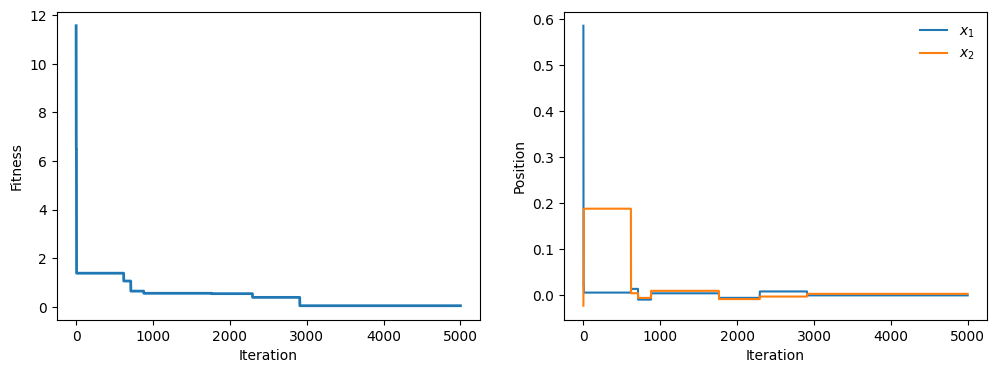

In [17]:
hist_values = met.historical

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(hist_values['fitness'], lw=2)
axs[0].set_xlabel('Iteration'), axs[0].set_ylabel('Fitness')

axs[1].plot(hist_values['position'])
axs[1].set_xlabel(r'Iteration'), axs[1].set_ylabel(r'Position')
axs[1].legend([f"$x_{ii+1}$" for ii in range(6)], frameon=False)

plt.show()

In [18]:
# Initialise the fitness register
fitness = []
# Run the metaheuristic with the same problem 30 times
for rep in range(30):
    met = mh.Metaheuristic(prob, heur, num_iterations=1000, num_agents=100)
    met.reset_historicals()
    met.verbose = False
    met.run()
    print('rep = {}, x_best = {}, f_best = {}'.format(rep+1, *met.get_solution()))
    
    fitness.append(met.historical['fitness'])

rep = 1, x_best = [ 0.00527022 -0.00558166], f_best = 0.3057030995679497
rep = 2, x_best = [-0.0076741  -0.00644265], f_best = 0.5198390141692286
rep = 3, x_best = [-0.00188448 -0.00721239], f_best = 0.2877927597312251
rep = 4, x_best = [-0.00269928  0.00048978], f_best = 0.03911702944254358
rep = 5, x_best = [ 0.00573054 -0.00121503], f_best = 0.1779834892725134
rep = 6, x_best = [-0.00580825 -0.01217719], f_best = 0.936365857080034
rep = 7, x_best = [ 0.00466699 -0.00028895], f_best = 0.11349850568885245
rep = 8, x_best = [-0.00373492 -0.00233678], f_best = 0.10084677700453071
rep = 9, x_best = [-0.00134595  0.00038648], f_best = 0.01019691583492488
rep = 10, x_best = [0.00041476 0.00586157], f_best = 0.17905537991286735
rep = 11, x_best = [0.01386546 0.00317913], f_best = 1.035977409048261
rep = 12, x_best = [-0.00226386 -0.00155303], f_best = 0.039183328676649865
rep = 13, x_best = [-0.00115252 -0.00439884], f_best = 0.10737317735556928
rep = 14, x_best = [ 0.01031575 -0.00047228],

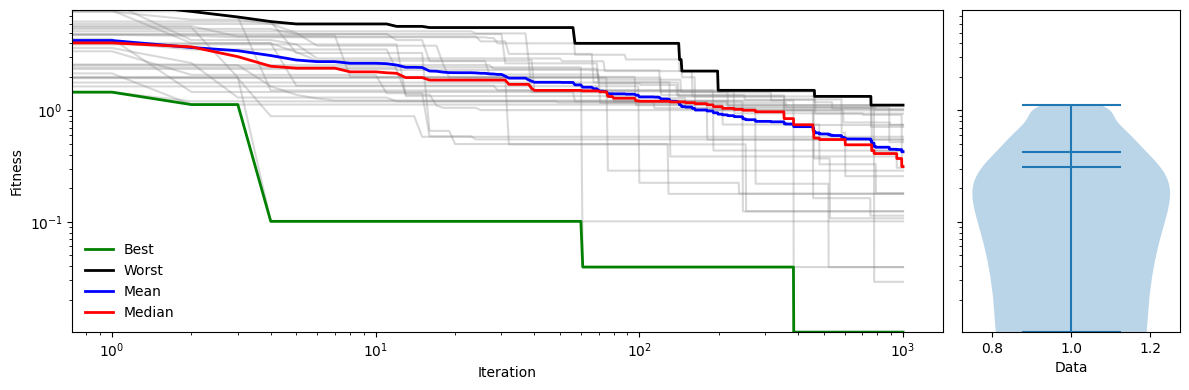

In [19]:
fitness_array = np.array(fitness).T
final_fitness = np.array([x[-1] for x in fitness_array.T])
best_fitness = np.min(fitness_array)
initial_fitness = max([x[0] for x in fitness_array])

# Now plot the fitness values
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey='row', gridspec_kw={'width_ratios': [0.8, 0.2]})
axs[0].plot(fitness_array, 'grey', alpha=0.3)

axs[0].plot(np.min(fitness_array, axis=1), 'g', lw=2, label='Best')
axs[0].plot(np.max(fitness_array, axis=1), 'k', lw=2, label='Worst')
axs[0].plot(np.mean(fitness_array, axis=1), 'b', lw=2, label='Mean')
axs[0].plot(np.median(fitness_array, axis=1), 'r', lw=2, label='Median')

axs[0].set_ylabel(r'Fitness')
axs[0].set_xlabel(r'Iteration')
axs[0].set_ylim([best_fitness, initial_fitness])

# Violin plot
axs[1].violinplot(final_fitness, showmeans=True, showmedians=True)
axs[1].set_xlabel(r'Data')

axs[0].legend(frameon=False)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_xscale('log')
plt.tight_layout()
plt.show()